In [70]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
seasonal = sm.tsa.seasonal_decompose

df = pd.read_csv('earnings_timeseries.csv')
df['date'] = pd.to_datetime(df['date'],format="%d/%m/%Y")
df.set_index('date',inplace=True)
df = df.loc['1993-01-01':'2019-12-01',]
columns = [i for i in df.columns]
names = [i.replace('_',' ').title() for i in df.columns]
units = 5*['Yen at current prices']+3*['Hours per month']+['Days per month']

df.rename(columns=dict(zip(columns,names)),inplace=True)

for i in df.columns:
    df[i] = seasonal(df[i],model='multiplicative',extrapolate_trend='freq').trend

df.head()

,Cash Earnings,Mandatory Earnings,Scheduled Earnings,Unscheduled Earnings,Special Earnings,Total Hours,Scheduled Hours,Unscheduled Hours,Work Days
date,,,,,,,,,
1993-01-01,428188.560849,315638.458430,291142.612277,24495.846154,112550.102418,167.997086,155.703836,12.293250,20.404652
1993-02-01,428876.502720,316332.496164,291822.273407,24510.222756,112544.006556,167.900510,155.627627,12.272883,20.397484
1993-03-01,429564.444590,317026.533897,292501.934538,24524.599359,112537.910693,167.803934,155.551418,12.252516,20.390317
1993-04-01,430252.386461,317720.571630,293181.595668,24538.975962,112531.814831,167.707357,155.475209,12.232148,20.383149
1993-05-01,430940.328331,318414.609363,293861.256799,24553.352564,112525.718969,167.610781,155.399000,12.211781,20.375981


Text(0.5, 0.98, 'Monthly earnings and hours for full-time workers at firms with 30 or more employees in Japan')

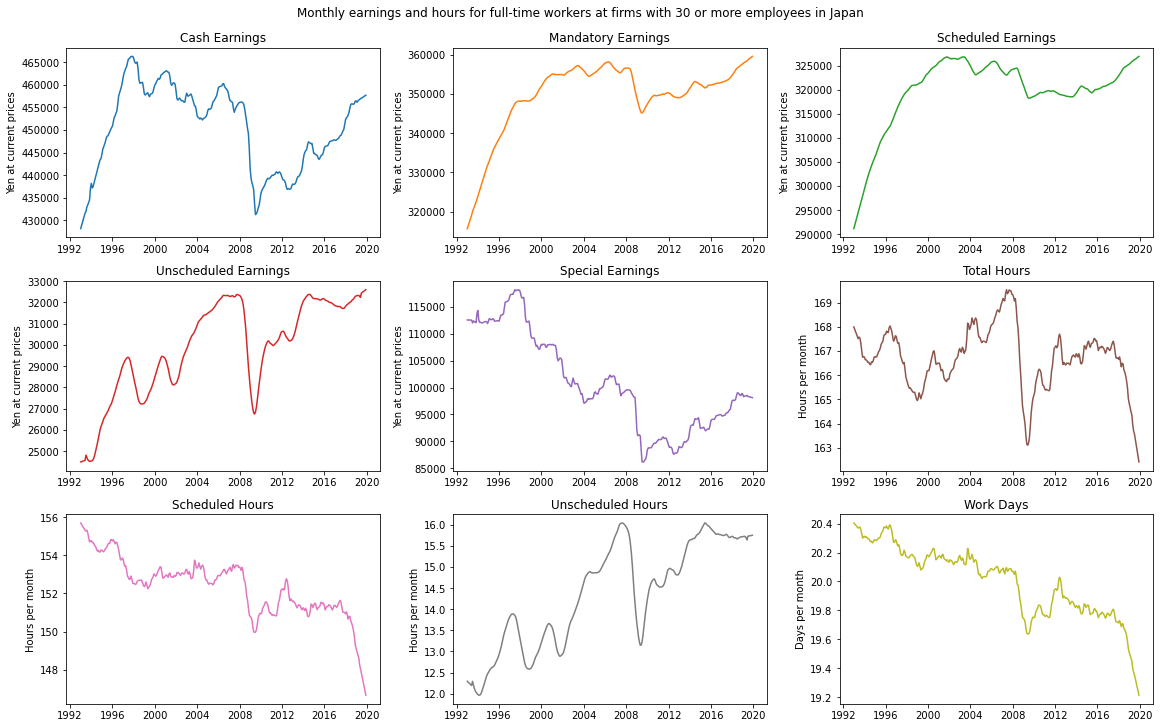

In [72]:
fig, axs = plt.subplots(3,3,figsize=(16,10),constrained_layout=True)

for i in range(len(names)):
    axs.flatten()[i].plot(df[names[i]],color='C{}'.format(i))
    axs.flatten()[i].set_title(names[i])
    axs.flatten()[i].set_ylabel(units[i])

fig.suptitle('Monthly earnings and hours for full-time workers at firms with 30 or more employees in Japan')

Text(0.5, 0.98, 'Nominal hourly earnings for full-time workers at firms with over 30 employees in Japan')

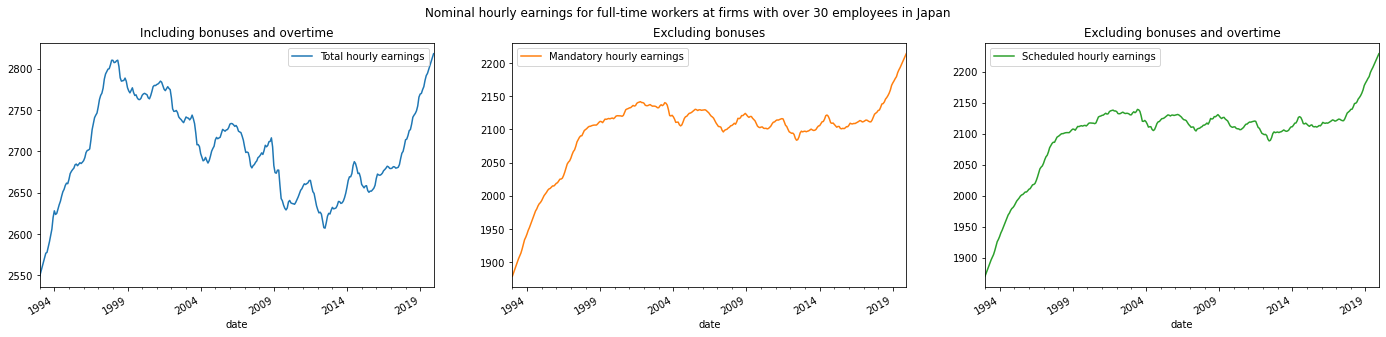

In [92]:
df['Total hourly earnings'] = df['Cash Earnings']/df['Total Hours']
df['Mandatory hourly earnings'] = df['Mandatory Earnings']/df['Total Hours']
df['Scheduled hourly earnings'] = df['Scheduled Earnings']/df['Scheduled Hours']

df.filter(regex='hourly').plot(subplots=True,layout=(1,3),figsize=(24,5),title=['Including bonuses and overtime','Excluding bonuses','Excluding bonuses and overtime'])
plt.suptitle('Nominal hourly earnings for full-time workers at firms with over 30 employees in Japan')